In [76]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
from dython.nominal import associations
import matplotlib.pyplot as plt

In [5]:
os.chdir('..')

In [6]:
df = pd.read_csv('ENG_DATA/CLEANED/12-8_Cleaned_df.csv', index_col = [0])

In [9]:
df.head(2)

,longitude,latitude,elevation,full_address,city,street_name,zip,area,district_no,subdist_no,...,stolen property,suicide,suspicious occ,trea,trespass,vandalism,vehicle theft,warrants,weapon laws,totalincidents
0,-122.50965,37.780280,200.83,"2645 El Camino Del Mar, San Francisco, CA 94121",San Francisco,El Camino Del Mar,94121,1050,1,1050,...,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,44.0
1,-122.50929,37.762608,23.21,"1278 La Playa St, San Francisco, CA 94122",San Francisco,La Playa St,94122,2030,2,2030,...,34.0,10.0,444.0,0.0,60.0,680.0,856.0,192.0,65.0,8385.0


In [13]:
x = df.drop(columns = 'sale_price')
y = df.sale_price

In [21]:
x_num = x.select_dtypes(include = 'number')
x_cat = x.select_dtypes(exclude = 'number')

In [43]:
x_num_standard = (x_num - x_num.mean()) / (x_num.std())  
y_standard = (y - y.mean()) / (y.std())  

In [46]:
x_num_standard.head(2)

,longitude,latitude,elevation,zip,area,district_no,subdist_no,cdom,rooms,baths,...,stolen property,suicide,suspicious occ,trea,trespass,vandalism,vehicle theft,warrants,weapon laws,totalincidents
0,-2.000216,1.558516,-0.328772,0.015522,-1.395784,-1.394865,-1.395784,-0.706817,1.047873,1.305587,...,-0.768032,-0.974301,-0.928629,-0.215958,-0.654953,-1.019306,-1.200220,-0.498742,-0.613245,-0.831574
1,-1.988657,0.771678,-1.477111,0.038519,-1.093861,-1.087252,-1.093861,-0.130955,1.344178,2.684049,...,0.557401,2.138382,1.319000,-0.215958,0.712253,1.558438,1.624472,0.170423,0.177451,0.825860


In [ ]:
x_num.columns

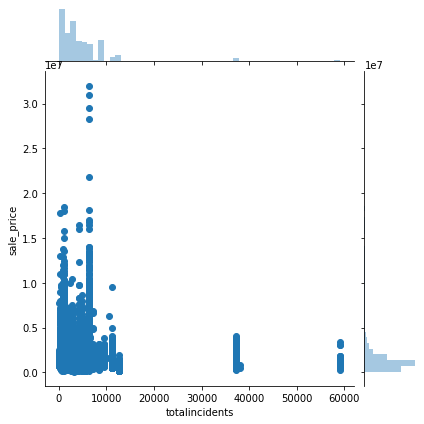

In [42]:
visualized_cols = ['longitude', 'latitude', 'orig_list_price', 'rooms', 'baths', 'totalincidents']
# for col in x_num.columns[:1]: 
sns.jointplot(x_num['totalincidents'], y)

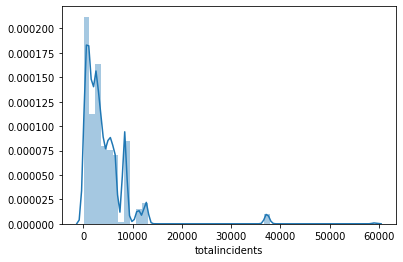

In [40]:
ax = sns.distplot(x_num['totalincidents'], hist=True)

# Pearson Correlation Matrix

In [62]:
#split data on school and crime data 
list_ = list(x_num_standard.columns)
idx = list_.index("orig_list_price")
idx2 = list_.index("arson")
columns_housing = list_[:idx+1]
columns_school = list_[idx+1:idx2]
columns_crime = list_[idx2:]

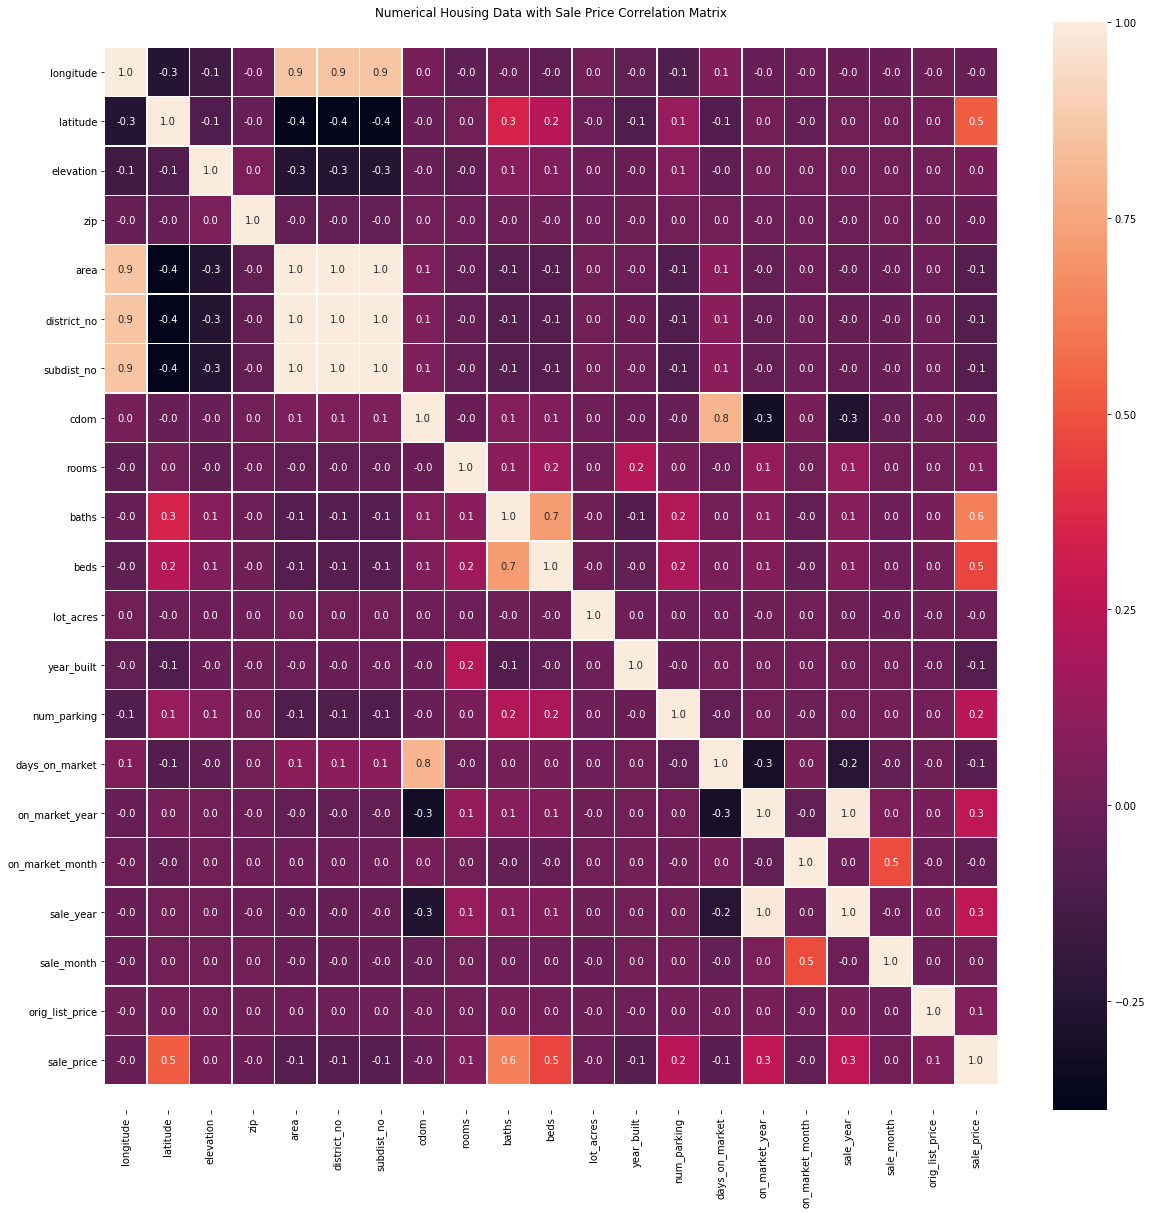

In [74]:
# Housing Data Matrix - NUMERICAL
f,ax = plt.subplots(figsize=(20, 20))
## fix for mpl bug that cuts off top/bottom of seaborn viz
sns_cor_plot_num_housing = sns.heatmap(x_num_standard[x_num_standard.columns.intersection(columns_housing)].join(y_standard).corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title("Numerical Housing Data with Sale Price Correlation Matrix")
plt.show() # ta-da!

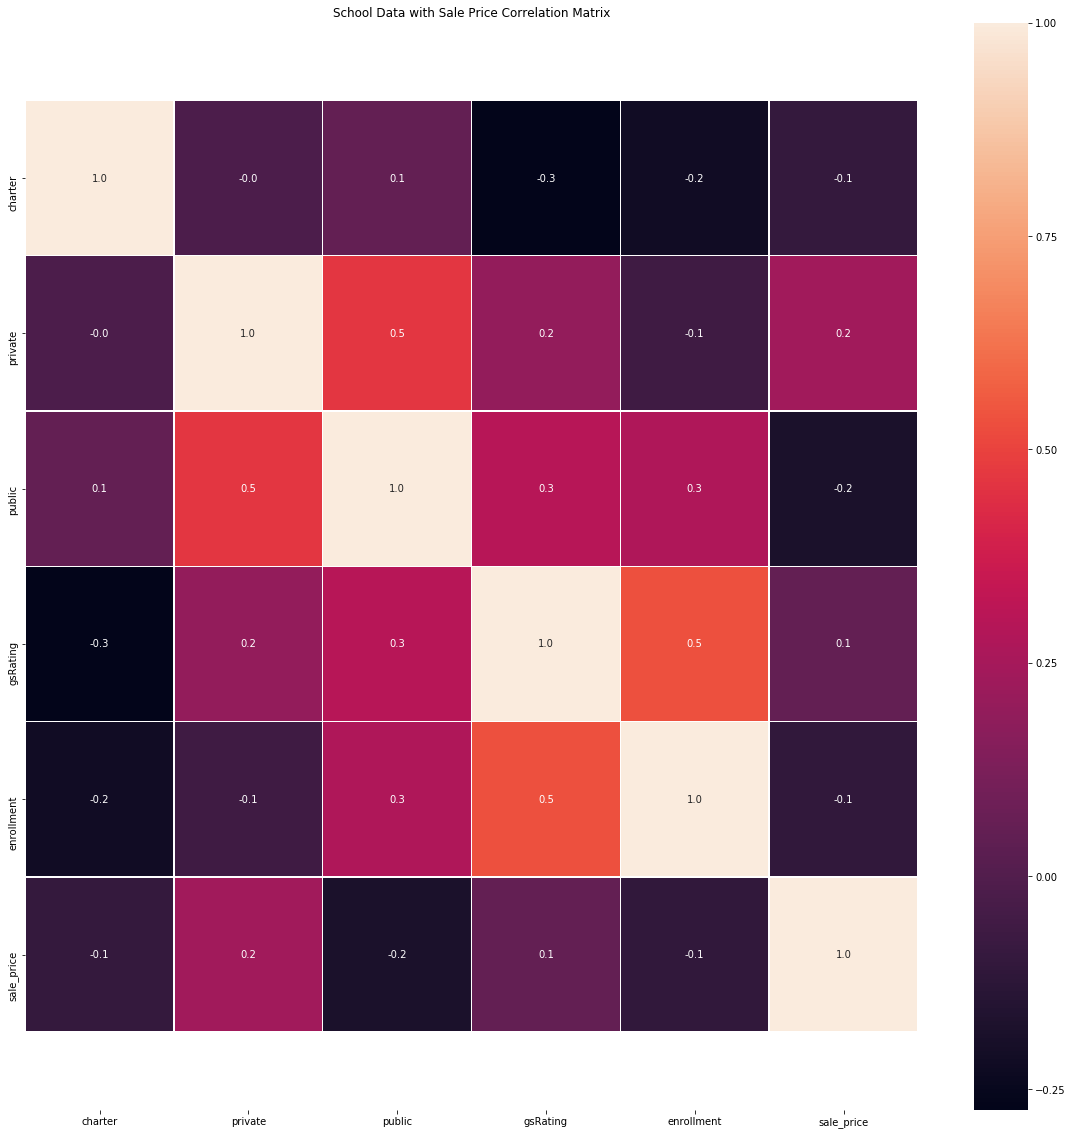

In [73]:
# School Data Matrix - NUMERICAL
f,ax = plt.subplots(figsize=(20, 20))
## fix for mpl bug that cuts off top/bottom of seaborn viz
sns_cor_plot_num_school = sns.heatmap(x_num_standard[x_num_standard.columns.intersection(columns_school)].join(y_standard).corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title("School Data with Sale Price Correlation Matrix")
plt.show() # ta-da!

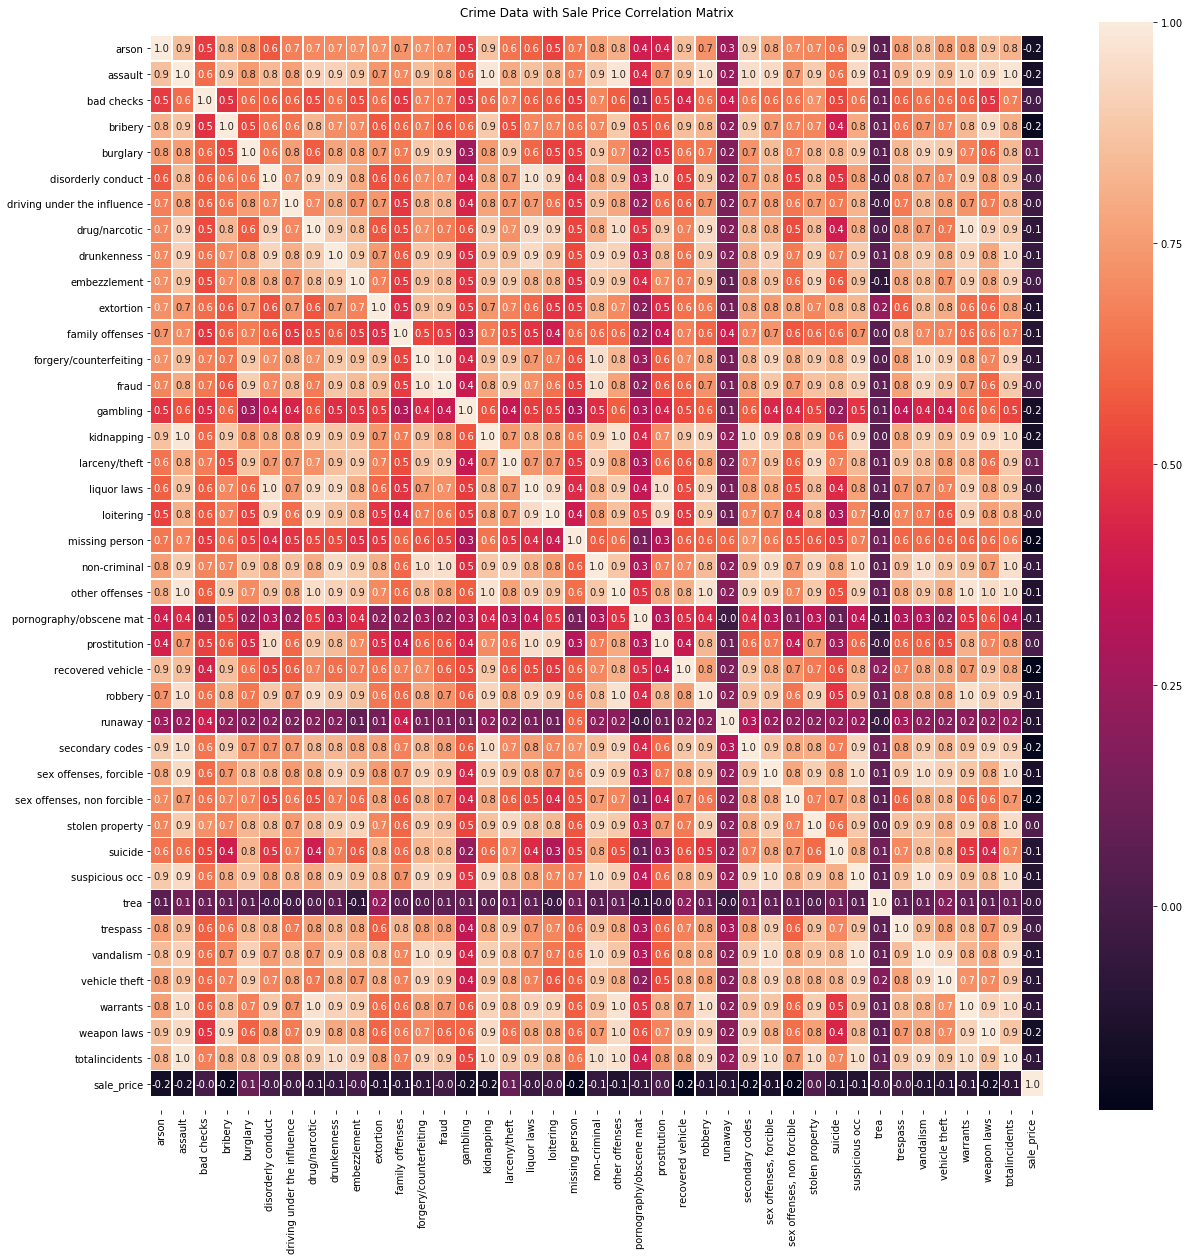

In [72]:
# Crime Data Matrix - NUMERICAL
f,ax = plt.subplots(figsize=(20, 20))
## fix for mpl bug that cuts off top/bottom of seaborn viz
sns_cor_plot_num_crime = sns.heatmap(x_num_standard[x_num_standard.columns.intersection(columns_crime)].join(y_standard).corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title("Crime Data with Sale Price Correlation Matrix")
plt.show() # ta-da!

## Categorical Data using dython

In [83]:
list_ = list(x_cat.columns)

In [88]:
cat_corr = associations(x_cat.drop(columns = 'city').join(y_standard), nominal_columns=list_, plot = False, return_results=True)

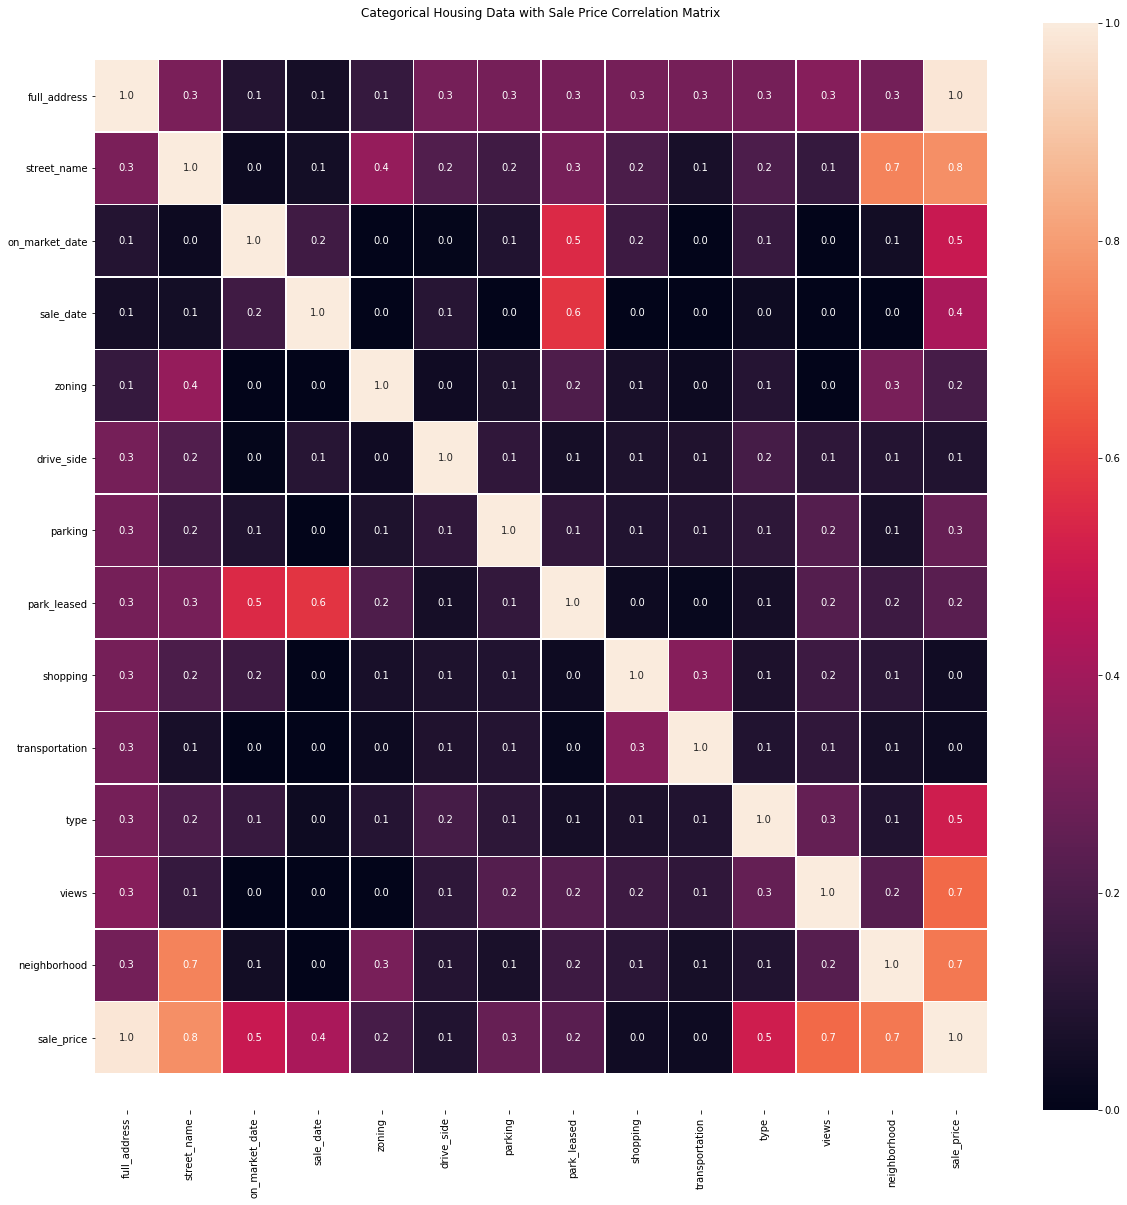

In [89]:
# Housing Matrix - CATEGORICAL
f,ax = plt.subplots(figsize=(20, 20))
## fix for mpl bug that cuts off top/bottom of seaborn viz
sns_cor_plot_cat = sns.heatmap(cat_corr, annot=True, linewidths=.5, fmt= '.1f',ax=ax)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title("Categorical Housing Data with Sale Price Correlation Matrix")
plt.show() # ta-da!

In [90]:
#save plots 
sns_cor_plot_num_housing.figure.savefig("RESULTS/feature_visualization/corr_matrix_num_housing.png")
sns_cor_plot_num_school.figure.savefig("RESULTS/feature_visualization/corr_matrix_num_school.png")
sns_cor_plot_num_crime.figure.savefig("RESULTS/feature_visualization/corr_matrix_num_crime.png")
sns_cor_plot_cat.figure.savefig("RESULTS/feature_visualization/corr_matrix_cat.png")

## Visualize Crime & School Data